In [ ]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df['BMI'].value_counts()

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: count, Length: 248, dtype: int64

In [ ]:
df['BloodPressure'].value_counts()

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64

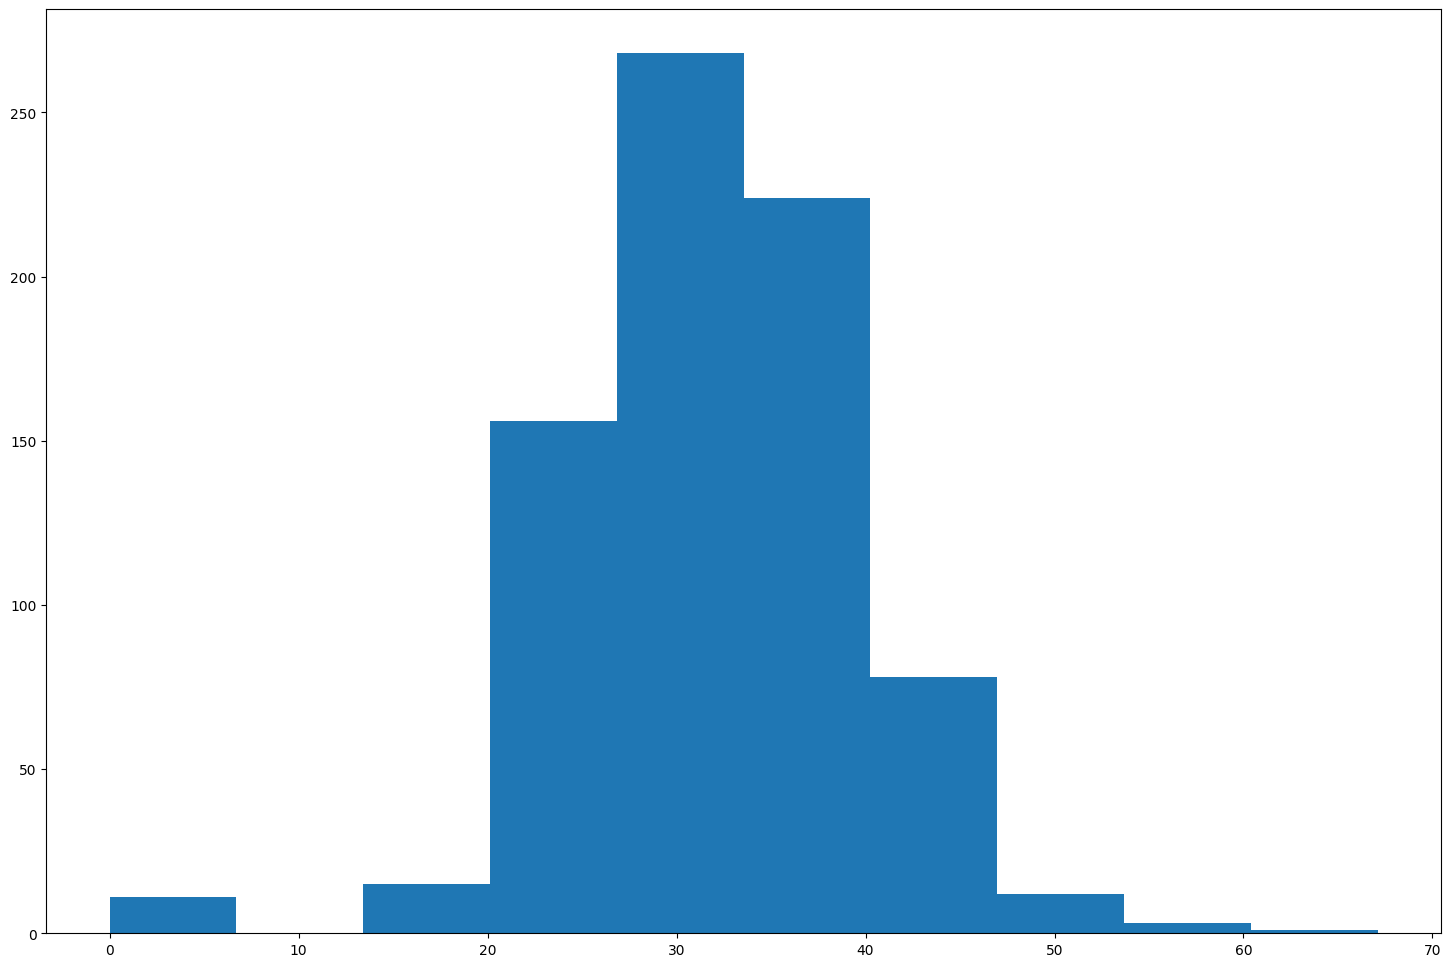

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['BMI'])
plt.show()

In [ ]:
df['BMI'] = df['BMI'].replace(0.0, df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0.0, df['BloodPressure'].mean())
df['Insulin'] = df['Insulin'].replace(0.0, df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0.0, df['SkinThickness'].mean())

df['BMI'].value_counts()

BMI
32.000000    13
31.600000    12
31.200000    12
31.992578    11
32.400000    10
             ..
36.700000     1
41.800000     1
42.600000     1
42.800000     1
46.300000     1
Name: count, Length: 248, dtype: int64

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40.0,35.000000,168.000000,43.1,2.288,33,1


In [ ]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

X[:5]

array([[6.00000000e+00, 1.48000000e+02, 7.20000000e+01, 3.50000000e+01,
        7.97994792e+01, 3.36000000e+01, 6.27000000e-01, 5.00000000e+01],
       [1.00000000e+00, 8.50000000e+01, 6.60000000e+01, 2.90000000e+01,
        7.97994792e+01, 2.66000000e+01, 3.51000000e-01, 3.10000000e+01],
       [8.00000000e+00, 1.83000000e+02, 6.40000000e+01, 2.05364583e+01,
        7.97994792e+01, 2.33000000e+01, 6.72000000e-01, 3.20000000e+01],
       [1.00000000e+00, 8.90000000e+01, 6.60000000e+01, 2.30000000e+01,
        9.40000000e+01, 2.81000000e+01, 1.67000000e-01, 2.10000000e+01],
       [0.00000000e+00, 1.37000000e+02, 4.00000000e+01, 3.50000000e+01,
        1.68000000e+02, 4.31000000e+01, 2.28800000e+00, 3.30000000e+01]])

In [ ]:
#divide training and testing

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape

(614, 8)

In [ ]:
DS = DecisionTreeClassifier()

#training
DS.fit(X_train, y_train)

#testing
y_hat = DS.predict(X_test)

#evaluation
print('The accuracy score is: ', accuracy_score(y_test, y_hat))
print('')
print('The CM is: ', confusion_matrix(y_test, y_hat))
print('')
print('The Jaccard Score is: ', jaccard_score(y_test, y_hat, average='micro'))

The accuracy score is:  0.7077922077922078

The CM is:  [[70 29]
 [16 39]]

The Jaccard Score is:  0.5477386934673367


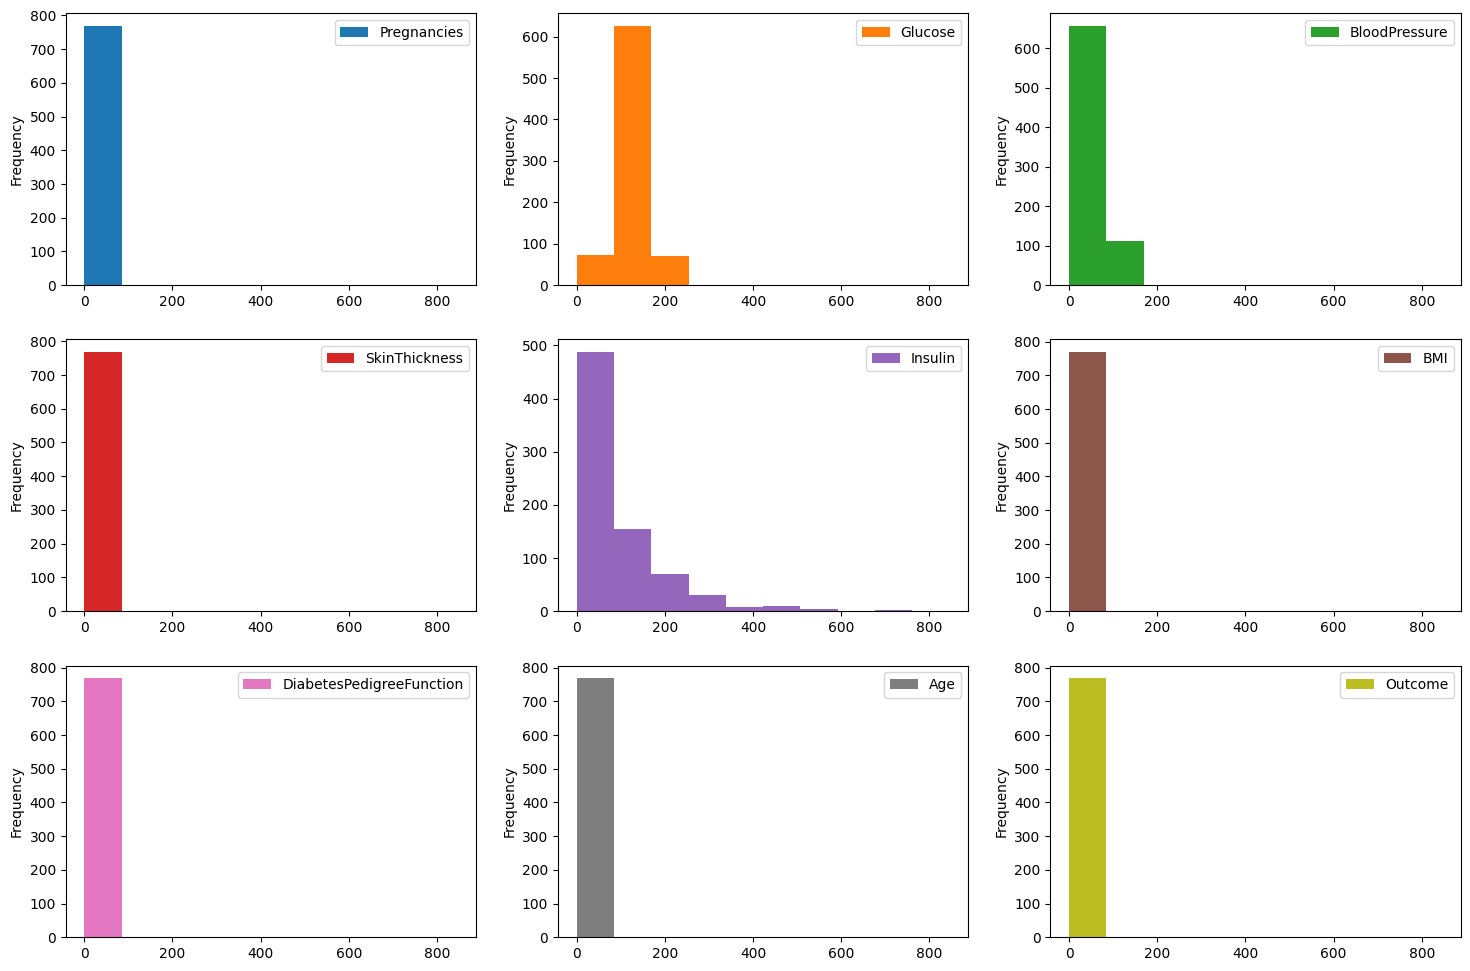

In [ ]:
#visualize the imbalance to see nak guna median or mean or see correlation
#histogram
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (18, 12)
df.plot(kind='hist', subplots=True, layout=(3, 3), sharex=False, sharey=False)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier()

#training
neigh.fit(X_train, y_train)

#prediction
y_hat = neigh.predict(X_test)

#evaluation

print('The accuracy is: ', (accuracy_score(y_test, y_hat))*100)

The accuracy is:  68.83116883116884


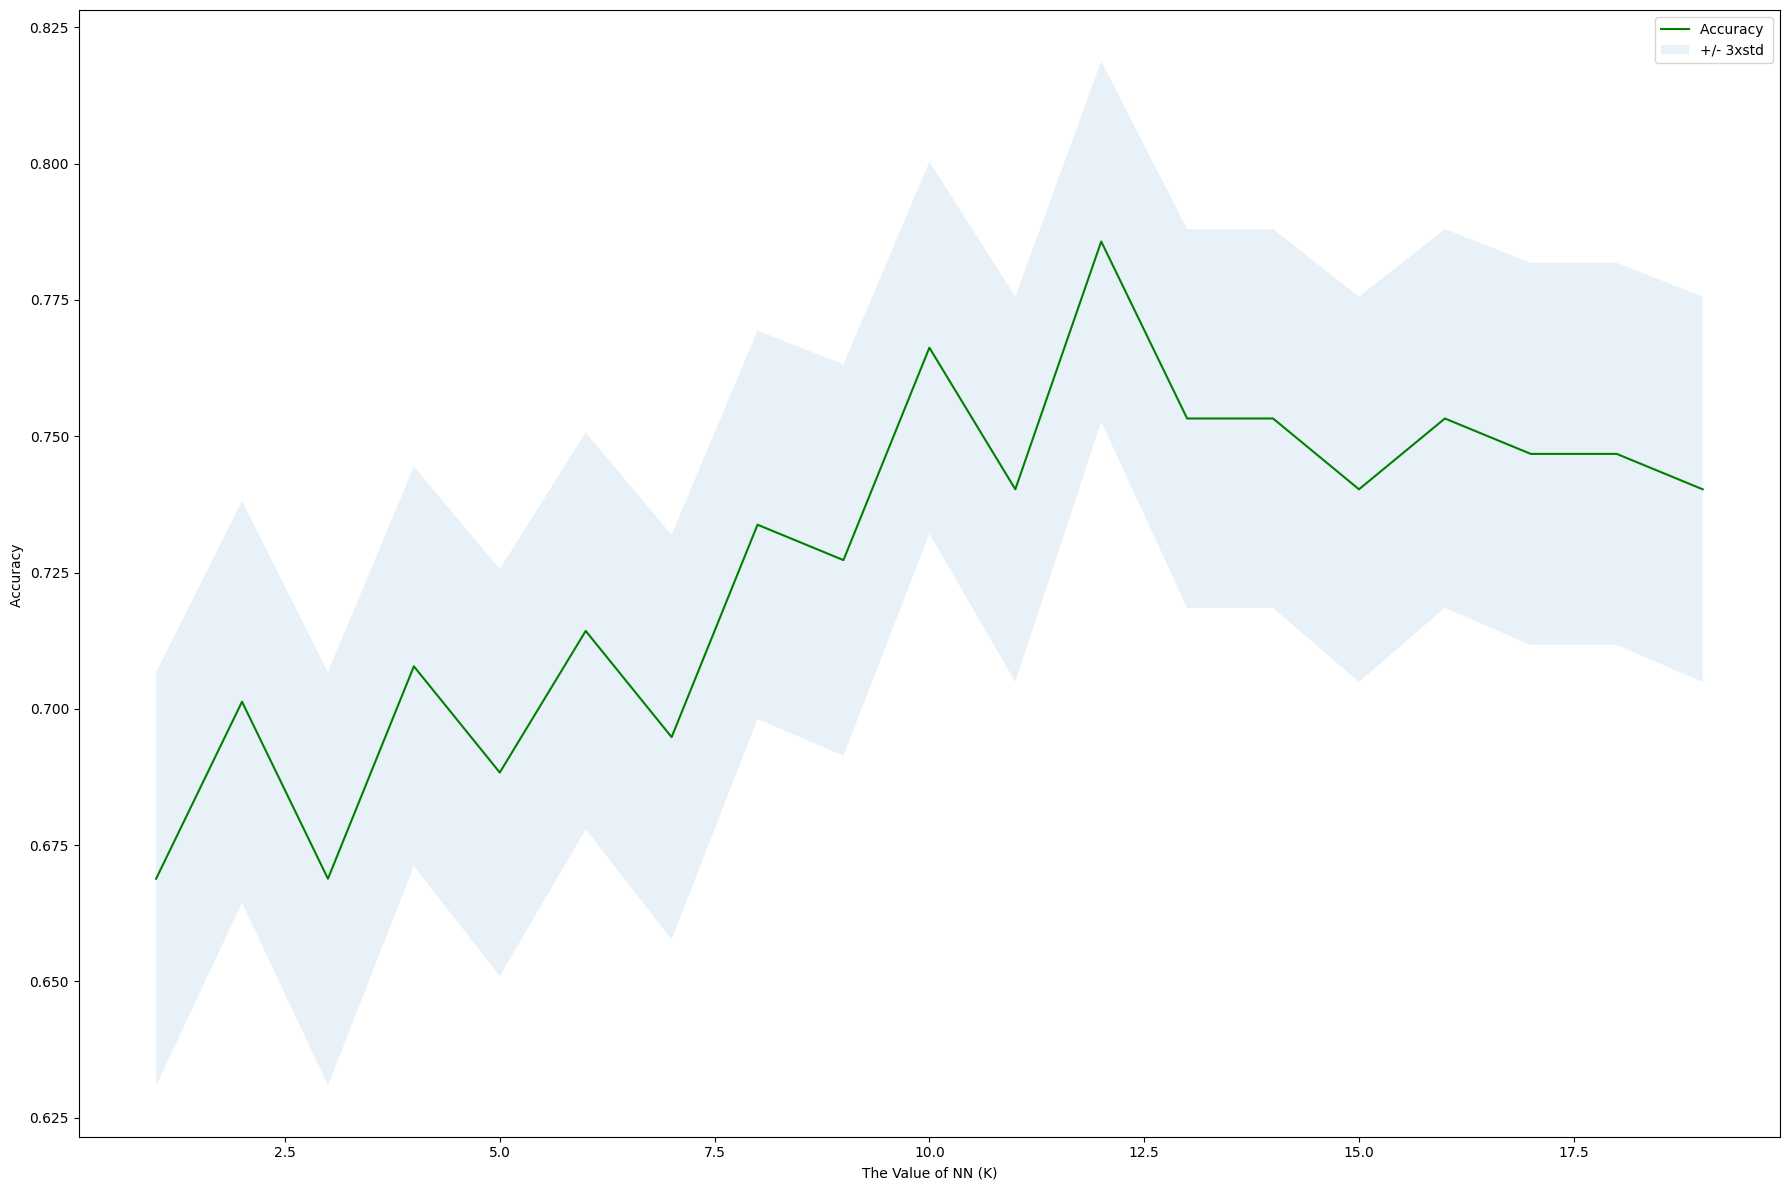



The best accuracy was with 0.7857142857142857 with k= 12


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

Ks =20   #the range of K
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks): #ni dia run from K=1 until Ks=...

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

#print (mean_acc)

print ('')
print ('')

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('The Value of NN (K)')
plt.tight_layout()
plt.show()

print ('')
print ('')

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)